# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 2000)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Load & Preview Data

In [4]:
data = pd.read_csv(r'E:\PYTHONCLASSJUPYTER\PrakashSenapati\2024_10_04_Resume Project_Price Prediction\avocado.csv')

In [3]:
data.shape

(18249, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Graph and Chart Analysis

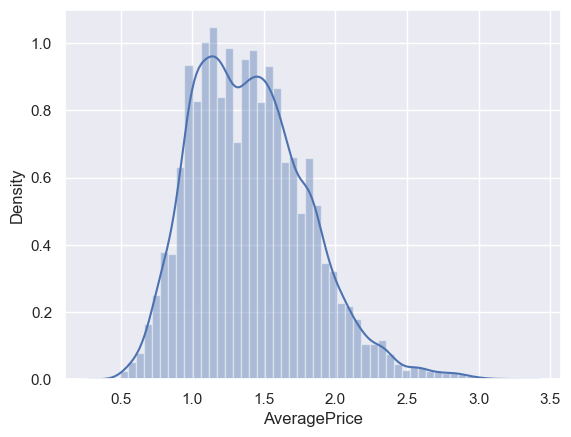

In [8]:
sns.distplot(data['AveragePrice']);

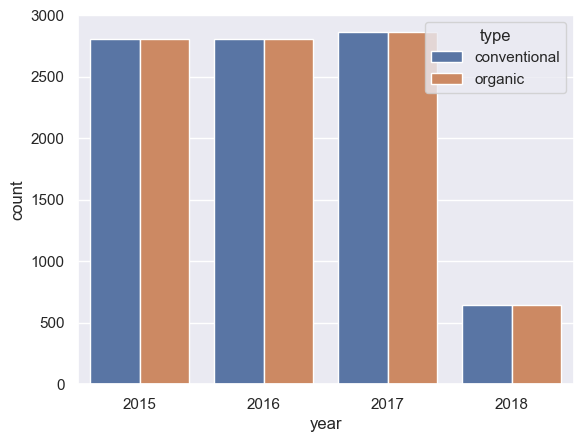

In [9]:
sns.countplot(x='year',data=data,hue='type');

In [10]:
data.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

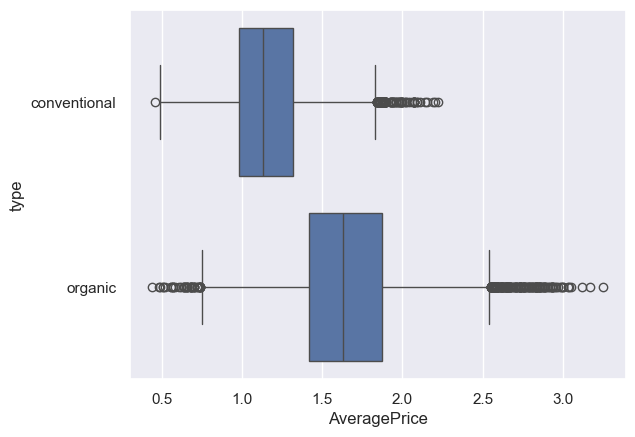

In [11]:
sns.boxplot(y="type", x="AveragePrice", data=data);

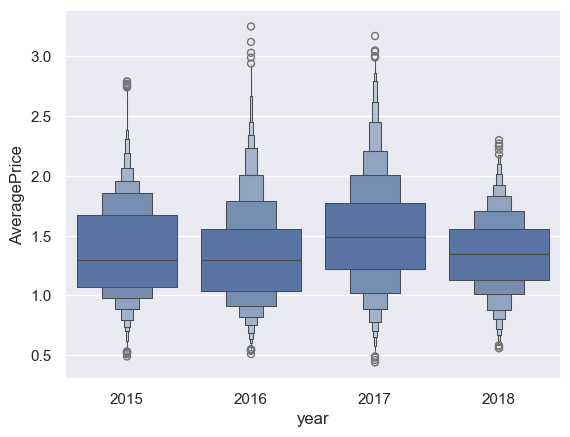

In [12]:
data.year=data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

# Dealing with `type` and `Date` columns.

In [17]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
data['type']= data['type'].map({'conventional':0,'organic':1})

In [20]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [7]:
# Change 'Date' datatype from 'object' to 'datetime64[ns]'

data.Date = data.Date.apply(pd.to_datetime)

In [22]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  int64         
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 1.9+ MB


In [8]:
data['Month']=data['Date'].apply(lambda x:x.month)

In [26]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11


In [9]:
data.drop('Date', axis=1, inplace=True)

In [28]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11


In [10]:
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [30]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,DEC
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,DEC
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,DEC
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,DEC
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,NOV


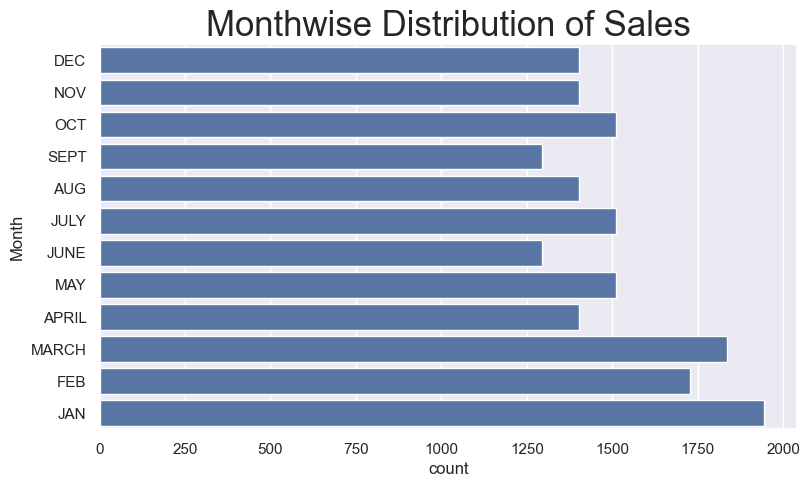

In [31]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

# Preparing data for ML models

## Creating Dummy Dataset

In [32]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,DEC
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,DEC
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,DEC
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,DEC
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,NOV


In [11]:
dummies = pd.get_dummies(data[['year','region','Month']], drop_first=True)

In [50]:
dummies.head().T

,0,1,2,3,4
year,2015,2015,2015,2015,2015
region_Atlanta,False,False,False,False,False
region_BaltimoreWashington,False,False,False,False,False
region_Boise,False,False,False,False,False
region_Boston,False,False,False,False,False
region_BuffaloRochester,False,False,False,False,False
region_California,False,False,False,False,False
region_Charlotte,False,False,False,False,False
region_Chicago,False,False,False,False,False
region_CincinnatiDayton,False,False,False,False,False


In [42]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,DEC
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,DEC
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,DEC
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,DEC
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,NOV


In [12]:
df_dummies = pd.concat(
    [
        data[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],
        dummies
    ],
    axis=1
)

In [49]:
df_dummies.head().T

,0,1,2,3,4
Total Volume,64236.62,54876.98,118220.22,78992.15,51039.6
4046,1036.74,674.28,794.7,1132.0,941.48
4225,54454.85,44638.81,109149.67,71976.41,43838.39
4770,48.16,58.33,130.5,72.58,75.78
Total Bags,8696.87,9505.56,8145.35,5811.16,6183.95
Small Bags,8603.62,9408.07,8042.21,5677.4,5986.26
Large Bags,93.25,97.49,103.14,133.76,197.69
XLarge Bags,0.0,0.0,0.0,0.0,0.0
type,0,0,0,0,0
year,2015,2015,2015,2015,2015


In [13]:
target = data['AveragePrice']

In [52]:
target.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

## Splitting data into training and test set

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies, target, test_size=0.30)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12774, 74)
(5475, 74)
(12774,)
(5475,)


In [59]:
X_train.head().T

,10142,3239,11057,17756,11902
Total Volume,2144.0,635036.01,4292.52,39706.28,8369.4
4046,74.98,80472.32,74.28,8896.86,4238.86
4225,917.96,355228.95,2037.97,939.38,3463.41
4770,0.0,99520.95,655.73,22.09,0.0
Total Bags,1151.06,99813.79,1524.54,29847.95,667.13
Small Bags,780.41,97150.37,1357.91,28597.18,596.67
Large Bags,370.65,2084.68,166.63,1250.77,70.46
XLarge Bags,0.0,578.74,0.0,0.0,0.0
type,1,0,1,1,1
year,2015,2016,2015,2018,2015


In [60]:
y_train.head()

10142    1.57
3239     1.67
11057    1.75
17756    1.38
11902    1.90
Name: AveragePrice, dtype: float64

## Standardizing the data

In [55]:
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']

In [62]:
cols_to_std

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

In [56]:
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [65]:
X_train.head().T

,10142,3239,11057,17756,11902
Total Volume,-0.248072,-0.064474,-0.247449,-0.237176,-0.246266
4046,-0.23389,-0.170161,-0.233891,-0.226897,-0.23059
4225,-0.245284,0.047872,-0.244358,-0.245267,-0.243178
4770,-0.215095,0.723327,-0.208912,-0.214886,-0.215095
Total Bags,-0.245169,-0.144722,-0.244788,-0.215953,-0.245661
Small Bags,-0.246022,-0.116518,-0.245246,-0.208641,-0.246269
Large Bags,-0.224949,-0.217894,-0.225788,-0.221326,-0.226184
XLarge Bags,-0.182204,-0.148024,-0.182204,-0.182204,-0.182204
type,1,0,1,1,1
year,2015,2016,2015,2018,2015


In [66]:
X_test.head().T

,3154,14786,1578,2356,2731
Total Volume,1.973861,-0.247962,-0.132627,1.485935,1.630815
4046,1.999359,-0.233118,-0.231978,2.063244,2.193842
4225,1.92884,-0.245927,0.033725,1.67524,1.656942
4770,2.533088,-0.215095,-0.209359,0.127367,1.092019
Total Bags,1.712494,-0.244984,-0.1864,0.489867,0.748949
Small Bags,1.662825,-0.24528,-0.167952,0.521462,0.838478
Large Bags,1.77256,-0.226474,-0.226474,0.395841,0.46352
XLarge Bags,0.829129,-0.182204,-0.182204,-0.180083,-0.054122
type,0,1,0,0,0
year,2016,2017,2015,2015,2015


# Apply All Regression Models using `for loop`

In [72]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}

results = pd.DataFrame(columns=['MAE','MSE','R2-score'])

for method, func in regressors.items():
    
    model = func.fit(X_train, y_train)
    pred = model.predict(X_test)
    results.loc[method] = [np.round(mean_absolute_error(y_test,pred),3),
                           np.round(mean_squared_error(y_test,pred),3),
                           np.round(r2_score(y_test,pred),3)
                          ]

In [73]:
results

,MAE,MSE,R2-score
Linear Regression,0.188,0.061,0.621
Decision Tree,0.129,0.040,0.751
Random Forest,0.097,0.020,0.877
Support Vector Machines,0.116,0.026,0.835
K-nearest Neighbors,0.100,0.024,0.850
XGBoost,0.095,0.017,0.895


In [91]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [93]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.095000,0.017000,0.896000
Random Forest,0.095000,0.019000,0.887000
K-nearest Neighbors,0.102000,0.025000,0.846000
Support Vector Machines,0.118000,0.029000,0.827000
Decision Tree,0.131000,0.039000,0.762000
Linear Regression,0.188000,0.061000,0.631000


# Deep Neural Network

In [57]:
X_train_tf, X_val, y_train_tf, y_val = train_test_split(X_train, y_train, test_size=0.20)

In [58]:
print(X_train_tf.shape)
print(X_val.shape)
print(y_train_tf.shape)
print(y_val.shape)

(10219, 74)
(2555, 74)
(10219,)
(2555,)


In [59]:
X_train_tf.head().T

,9258,13814,143,17613,2340
Total Volume,-0.240215,-0.242008,-0.049501,-0.238809,1.173879
4046,-0.225153,-0.228353,-0.183454,-0.22942,1.600992
4225,-0.239614,-0.23899,0.091278,-0.238777,0.838971
4770,-0.19965,-0.208403,0.199806,-0.208575,3.457602
Total Bags,-0.237164,-0.239136,-0.071629,-0.226686,0.643038
Small Bags,-0.236939,-0.242169,-0.024678,-0.229809,0.66704
Large Bags,-0.221124,-0.21312,-0.201041,-0.200614,0.219567
XLarge Bags,-0.170266,-0.170266,-0.170266,-0.170266,4.583785
type,1,1,0,1,0
year,2015,2016,2015,2018,2015


In [60]:
y_train_tf.head().T

9258     1.61
13814    2.10
143      1.25
17613    1.56
2340     0.81
Name: AveragePrice, dtype: float64

In [ ]:
# X_train_tf.columns

In [61]:
for col in X_train_tf.select_dtypes(include='bool').columns:
    X_train_tf[col] = X_train_tf[col].astype('float')
    X_val[col] = X_val[col].astype('float')

In [62]:
X_train_tf.values[0]

array([-2.40215417e-01, -2.25152767e-01, -2.39613508e-01, -1.99649906e-01,
       -2.37164103e-01, -2.36939038e-01, -2.21124202e-01, -1.70265927e-01,
        1.00000000e+00,  2.01500000e+03,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [63]:
X_val.values[0]

array([-1.97417001e-01, -2.28080290e-01, -1.44805111e-01, -1.73748719e-01,
       -2.02411428e-01, -2.15622518e-01, -1.45982185e-01, -1.70265927e-01,
        0.00000000e+00,  2.01500000e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [64]:
y_train_tf.values[0:5]

array([1.61, 2.1 , 1.25, 1.56, 0.81])

In [65]:
y_val.values[0:5]

array([0.95, 1.45, 1.4 , 1.86, 1.34])

In [66]:
model = Sequential()

model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))

model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))

model.add(Dropout(0.5))

model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))

model.add(Dropout(0.5))

model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))

model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [67]:
model.fit(
    x = X_train_tf.values,
    y = y_train_tf.values,
    validation_data = (X_val.values, y_val.values),
    batch_size = 100,
    epochs = 150,
    callbacks = [early_stop])

Epoch 1/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 144.3555 - val_loss: 1.6162
Epoch 2/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9183 - val_loss: 0.9460
Epoch 3/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4843 - val_loss: 0.6715
Epoch 4/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3680 - val_loss: 0.5739
Epoch 5/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3152 - val_loss: 0.5351
Epoch 6/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2867 - val_loss: 0.4054
Epoch 7/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2610 - val_loss: 0.4087
Epoch 8/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2523 - val_loss: 0.3029
Epoch 9/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2317 - val_loss: 0.2322
Epoch 10/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2172 - val_loss: 0.1804
Epoch 11/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1966 - val_loss: 0.1695
Epoch 12/150
103/103 ━━━━━━━━━━━━━━━━━━

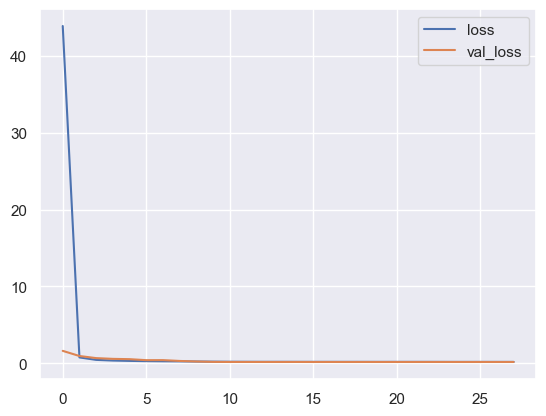

In [68]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot();

In [69]:
dnn_pred = model.predict(X_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [74]:
results.loc['Deep Neural Network'] = [mean_absolute_error(y_test,dnn_pred),
                                      mean_squared_error(y_test,dnn_pred),
                                      r2_score(y_test,dnn_pred)]

In [75]:
results

,MAE,MSE,R2-score
Linear Regression,0.188000,0.061000,0.621000
Decision Tree,0.129000,0.040000,0.751000
Random Forest,0.097000,0.020000,0.877000
Support Vector Machines,0.116000,0.026000,0.835000
K-nearest Neighbors,0.100000,0.024000,0.850000
XGBoost,0.095000,0.017000,0.895000
Deep Neural Network,0.318557,0.159959,0.000448
